In [1]:
#import all the necessary libraries
import matplotlib.pyplot as plt
import math
from nsepy import get_history
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date
plt.style.use('fivethirtyeight')


In [36]:
p="mrf"

#Get the data from the NSE 
df = get_history(p,start=date(2015,1,1), end= date(2021,2,23))
#Print the data to have a clear picture
df


Exception in thread Thread-145:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\http\client.py", line 1321, in getresponse
    response.begin()
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\http\client.py", line 296, in begin
    version, status, reason = self._read_status()
  File "C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\http\client.py", line 257, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

AttributeError: 'ThreadReturns' object has no attribute 'result'

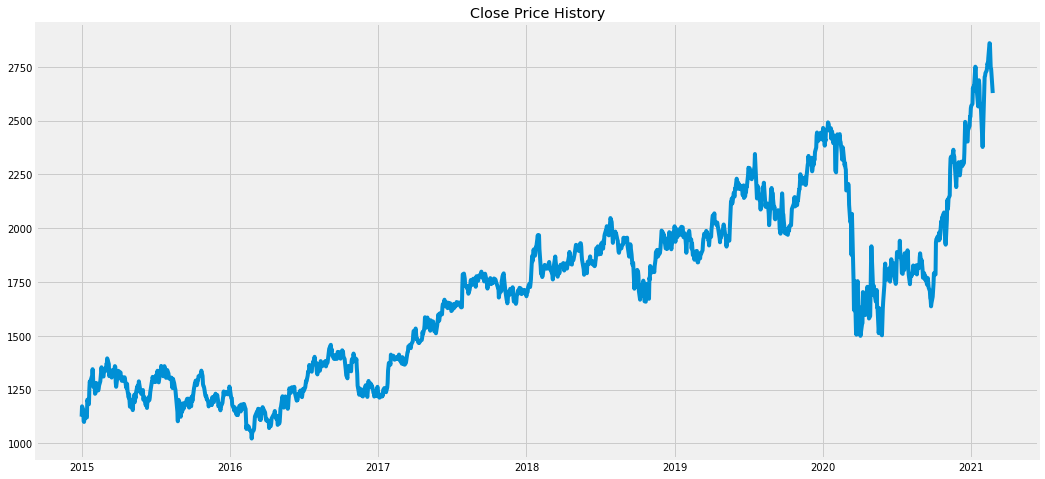

In [17]:
#Plotting the data 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

In [18]:
# Filter out required column that has to be predicted
data= df.filter(['Close'])
dataset=data.values

In [19]:
#Define size of training dataset 
train_len= math.ceil(len(dataset)*.8)
train_len

1219

In [20]:
# Scale the whole dataset 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.05543014],
       [0.08148612],
       [0.07305464],
       ...,
       [0.93518644],
       [0.88658308],
       [0.87388147]])

In [21]:
#Extract the training dataset from the original dataset
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]

for i in range(90,train_len):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    

In [22]:
#Convert the traning dataset to an array
x_train , y_train = np.array(x_train), np.array(y_train)

In [23]:
#Reshape the trainig dataset from 2D to 3D
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1129, 90, 1)

In [24]:
#Create LSTM layers for the neural network
model= Sequential()
model.add(LSTM(270,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(170,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(155,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Add optimizer and error calculation method to the layer
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
#Train the neural network on the training dataset
model.fit(x_train,y_train,batch_size=1,epochs=1)

1129/1129 [==============================] - 237s 207ms/step - loss: 0.0023


In [28]:
#Create the test dataset from original dataset to test the learning of neural network
test_data=scaled_data[train_len-90: , :]
x_test=[]
y_test=dataset[train_len:, :]
for i in range (90, len(test_data)):
    x_test.append(test_data[i-90:i,0])

In [29]:
#Convert test dataset to an array
x_test=np.array(x_test)

In [30]:
#Reshape the test dataset from 2D to 3D
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [31]:
#Predict the values of the test dataset using the neural network
predictions= model.predict(x_test)

#Rescale the predicted dataset to original form
predictions=scaler.inverse_transform(predictions)

In [32]:
#Calculate the ROOT MEAN SQUARE EROR to get the error percentage
rmse  = np.sqrt(np.mean((predictions-y_test)**2))
rmse

163.82745365019667

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


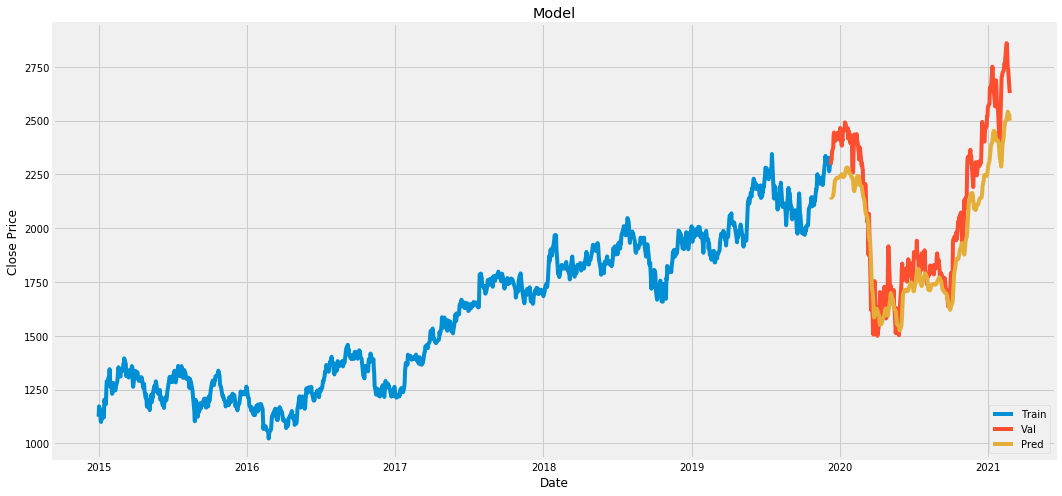

In [33]:
#Plot the graph for Training Dataset, Test Dataset, and Predicted Dataset
train = data[0:train_len]
valid= data[train_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Pred'],loc='lower right')
plt.show()

In [34]:
#Print the values of Test Dataset and Predicted Dataset 
valid

,Close,Predictions
Date,,
2019-12-10,2295.15,2144.934326
2019-12-11,2321.65,2141.554199
2019-12-12,2318.45,2141.924316
2019-12-13,2354.50,2144.625732
2019-12-16,2375.25,2152.093506
2019-12-17,2430.10,2163.921143
2019-12-18,2445.15,2182.556885
2019-12-19,2411.90,2204.409668
2019-12-20,2404.10,2220.636230


In [20]:
#Predict the price of next day 

#Get the quote
quote_price= get_history(p,start=date(2018,1,27),end=date(2021,1,27))

#Create a new dataframe
new_df= quote_price.filter(['Close'])

#Get the last 90 day closing price values and convert the datframe to array
last_60_days=new_df[-90:].values

#Scale the data
last_60_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test=[]

#Append last 90 days to list
X_test.append(last_60_scaled)

#Convert it to a numpy array
X_test=np.array(X_test)

#Reshape it from 2D to 3D
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Predict the value based on last 60 day trend
pred_price=model.predict(X_test)

#Retransform the predicted value to original form
pred_price=scaler.inverse_transform(pred_price)

#Print the predicted value
print(pred_price)

[[306.3362]]


In [21]:
pri= get_history(p,start=date(2021,1,28),end=date(2021,1,28))

print(pri['Close'][0])

282.35



### Complete code for LSTM Model to predict the stock price.


In [1]:
#import all the necessary libraries
import matplotlib.pyplot as plt
import math
from nsepy import get_history
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date
plt.style.use('fivethirtyeight')


p="sbin"

#Get the data from the NSE 
df = get_history(p,start=date(2015,1,1), end= date(2021,2,23))
#Print the data to have a clear picture
print(df)



#Plotting the data 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

# Filter out required column that has to be predicted
data= df.filter(['Close'])
dataset=data.values

#Define size of training dataset 
train_len= math.ceil(len(dataset)*.8)


# Scale the whole dataset 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


#Extract the training dataset from the original dataset
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]

for i in range(90,train_len):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    

#Convert the traning dataset to an array
x_train , y_train = np.array(x_train), np.array(y_train)

#Reshape the trainig dataset from 2D to 3D
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Create LSTM layers for the neural network
model= Sequential()
model.add(LSTM(270,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(170,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(155,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Add optimizer and error calculation method to the layer
model.compile(optimizer='adam',loss='mean_squared_error')

#Train the neural network on the training dataset
model.fit(x_train,y_train,batch_size=1,epochs=1)

#Create the test dataset from original dataset to test the learning of neural network
test_data=scaled_data[train_len-90: , :]
x_test=[]
y_test=dataset[train_len:, :]
for i in range (90, len(test_data)):
    x_test.append(test_data[i-90:i,0])

#Convert test dataset to an array
x_test=np.array(x_test)

#Reshape the test dataset from 2D to 3D
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Predict the values of the test dataset using the neural network
predictions= model.predict(x_test)

#Rescale the predicted dataset to original form
predictions=scaler.inverse_transform(predictions)

#Calculate the ROOT MEAN SQUARE EROR to get the error percentage
rmse = np.sqrt(np.mean((predictions-y_test)**2))
print("Rmse value: {}".format(rmse))

#Plot the graph for Training Dataset, Test Dataset, and Predicted Dataset
train = data[0:train_len]
valid= data[train_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Pred'],loc='lower right')
plt.show()

#Print the values of Test Dataset and Predicted Dataset 
print(valid.tail(30))

'''#Predict the price of next day 

#Get the quote
quote_price= get_history(p,start=date(2015,1,27),end=date(2021,1,27))

#Create a new dataframe
new_df= quote_price.filter(['Close'])

#Get the last 90 day closing price values and convert the datframe to array
last_90_days=new_df[-90:].values

#Scale the data
last_90_scaled = scaler.transform(last_90_days)

#Create an empty list
X_test=[]

#Append last 90 days to list
X_test.append(last_90_scaled)

#Convert it to a numpy array
X_test=np.array(X_test)

#Reshape it from 2D to 3D
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Predict the value based on last 90 day trend
pred_price=model.predict(X_test)

#Retransform the predicted value to original form
pred_price=scaler.inverse_transform(pred_price)

#Print the predicted value
print(pred_price)

pri= get_history(p,start=date(2021,1,28),end=date(2021,1,28))

print(pri['Close'][0])'''

           Symbol Series  Prev Close    Open    High     Low    Last   Close  \
Date                                                                           
2015-01-01   SBIN     EQ      311.85  312.45  315.00  310.70  314.00  314.00   
2015-01-02   SBIN     EQ      314.00  314.35  318.30  314.35  315.60  315.25   
2015-01-05   SBIN     EQ      315.25  316.25  316.80  312.10  312.80  312.75   
2015-01-06   SBIN     EQ      312.75  310.00  311.10  298.70  299.90  299.90   
2015-01-07   SBIN     EQ      299.90  300.00  302.55  295.15  301.40  300.15   
2015-01-08   SBIN     EQ      300.15  305.00  306.50  302.35  305.25  304.85   
2015-01-09   SBIN     EQ      304.85  306.70  307.85  302.00  303.00  303.20   
2015-01-12   SBIN     EQ      303.20  304.15  307.80  301.10  306.90  307.10   
2015-01-13   SBIN     EQ      307.10  308.15  310.75  304.15  305.25  305.10   
2015-01-14   SBIN     EQ      305.10  304.00  307.00  302.25  305.00  304.70   
2015-01-15   SBIN     EQ      304.70  31

C:\Users\dxt_s\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1600x800 with 1 Axes>

1129/1129 [==============================] - 181s 158ms/step - loss: 0.0038
Rmse value: 12.154006544858602


C:\Users\dxt_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 1600x800 with 1 Axes>

             Close  Predictions
Date                           
2021-01-12  292.50   293.522278
2021-01-13  306.80   294.775970
2021-01-14  307.25   300.197144
2021-01-15  303.85   306.982208
2021-01-18  294.45   311.710022
2021-01-19  298.60   311.611572
2021-01-20  302.55   309.716522
2021-01-21  294.85   308.624969
2021-01-22  283.70   306.688873
2021-01-25  280.95   301.974915
2021-01-27  275.65   296.092987
2021-01-28  282.35   289.979950
2021-01-29  282.10   286.835327
2021-02-01  310.70   286.337036
2021-02-02  333.10   293.962830
2021-02-03  335.95   310.201630
2021-02-04  355.10   327.910645
2021-02-05  393.10   345.892670
2021-02-08  397.05   368.993591
2021-02-09  394.80   390.238251
2021-02-10  392.25   403.340973
2021-02-11  390.15   407.335083
2021-02-12  393.15   404.916962
2021-02-15  406.95   400.841125
2021-02-16  402.35   400.912384
2021-02-17  411.75   402.183899
2021-02-18  415.20   405.901123
2021-02-19  399.55   410.856903
2021-02-22  389.50   410.875397
2021-02-

"#Predict the price of next day \n\n#Get the quote\nquote_price= get_history(p,start=date(2015,1,27),end=date(2021,1,27))\n\n#Create a new dataframe\nnew_df= quote_price.filter(['Close'])\n\n#Get the last 90 day closing price values and convert the datframe to array\nlast_90_days=new_df[-90:].values\n\n#Scale the data\nlast_90_scaled = scaler.transform(last_90_days)\n\n#Create an empty list\nX_test=[]\n\n#Append last 90 days to list\nX_test.append(last_90_scaled)\n\n#Convert it to a numpy array\nX_test=np.array(X_test)\n\n#Reshape it from 2D to 3D\nX_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))\n\n#Predict the value based on last 90 day trend\npred_price=model.predict(X_test)\n\n#Retransform the predicted value to original form\npred_price=scaler.inverse_transform(pred_price)\n\n#Print the predicted value\nprint(pred_price)\n\npri= get_history(p,start=date(2021,1,28),end=date(2021,1,28))\n\nprint(pri['Close'][0])"

In [2]:
print("Rmse value: {}".format(rmse))
print(valid.tail(50))

Rmse value: 11.881967954483748
             Close  Predictions
Date                           
2020-12-14  274.20   275.173920
2020-12-15  270.65   275.498779
2020-12-16  269.40   274.975220
2020-12-17  267.70   273.676453
2020-12-18  271.45   271.893555
2020-12-21  254.70   271.616547
2020-12-22  257.45   267.223450
2020-12-23  263.00   262.361603
2020-12-24  266.85   260.748138
2020-12-28  275.20   262.759338
2020-12-29  277.90   268.598969
2020-12-30  276.90   275.531158
2020-12-31  274.95   280.363373
2021-01-01  279.40   281.788086
2021-01-04  281.05   282.400604
2021-01-05  281.75   283.207886
2021-01-06  285.05   284.158966
2021-01-07  287.70   285.922729
2021-01-08  286.00   288.481445
2021-01-11  282.50   290.140045
2021-01-12  292.50   289.607483
2021-01-13  306.80   291.277740
2021-01-14  307.25   298.622131
2021-01-15  303.85   307.025970
2021-01-18  294.45   311.755493
2021-01-19  298.60   309.725067
2021-01-20  302.55   306.224396
2021-01-21  294.85   304.885773
2021-01-2


### The below code is using ARIMA model to predict the values of the stocks.


In [3]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from nsepy import get_history
from datetime import date
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight')

In [4]:
variables= get_history('sbin',start=date(2015,1,27), end=date(2021,1,28))
price= variables['Close']

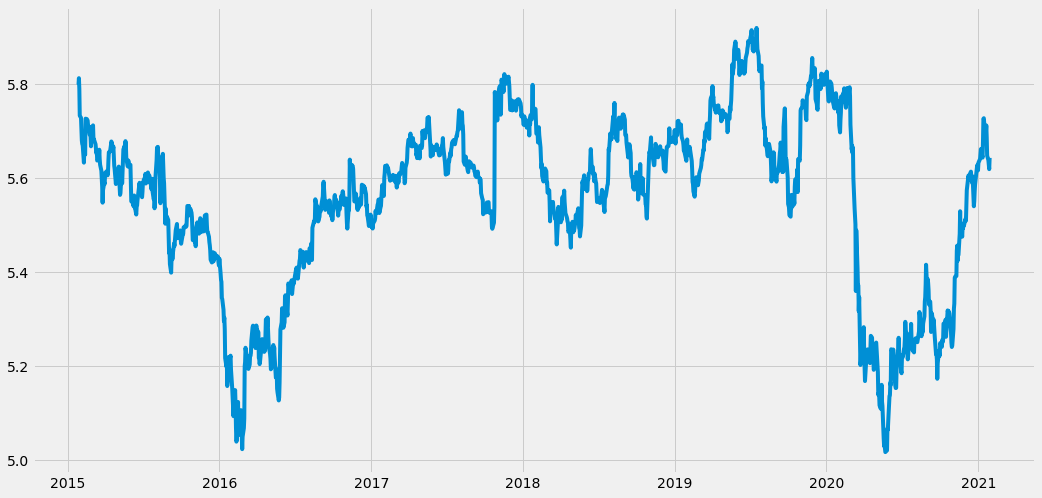

In [5]:
lnprice=np.log(price)
plt.figure(figsize=(16,8))
plt.plot(lnprice)
plt.show()

C:\Users\dxt_s\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


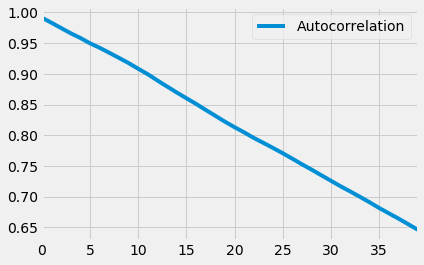

In [6]:
acf_1 = acf(lnprice)[1:lnprice.shape[0]-90]
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.plot(kind='line')
plt.show()

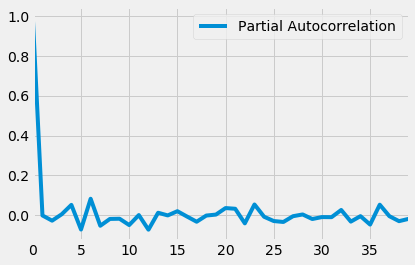

In [7]:
pacf_1 = pacf(lnprice)[1:lnprice.shape[0]-90]
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.plot(kind='line')
plt.show()

(-2.5553228004991135, 0.1025871024764034, 0, 1487, {'1%': -3.434755261885587, '5%': -2.863485639173984, '10%': -2.567805836609504}, -6968.8601479152985)


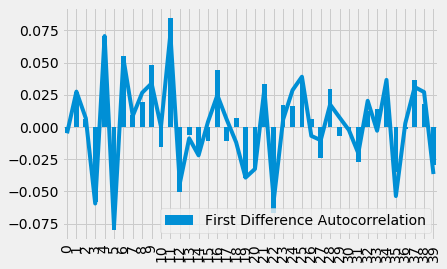

In [8]:
result= ts.adfuller(lnprice,1)
print(result)
lnprice_diff= lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff = acf(diff)[1:diff.shape[0]-90]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.plot(kind='bar')
pacf_1_diff= pacf(diff)[1:diff.shape[0]-90]
plt.plot(pacf_1_diff)
plt.show()

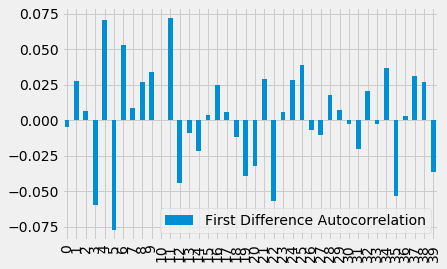

In [9]:
test_df = pandas.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.plot(kind='bar')

In [10]:
price_matrix= lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit=model.fit(disp=0)
predictions=model_fit.predict(lnprice.shape[0]-90,lnprice.shape[0],typ='levels')
predictionsadjusted=np.exp(predictions)
y=[round(num,2)for num in predictionsadjusted]
x=(get_history('sbin',start=date(2020,9,18), end=date(2021,1,28))['Close'])
tesdf= pandas.DataFrame({'Predicted':np.exp(y),'Actual':x})
print(tesdf)

C:\Users\dxt_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                Predicted  Actual
Date                             
2020-09-18   4.329436e+83  192.60
2020-09-21   4.822018e+80  185.80
2020-09-22   7.193606e+80  186.20
2020-09-23   6.525892e+79  183.80
2020-09-24   3.794425e+76  176.35
2020-09-25   1.317555e+79  182.20
2020-09-28   2.055682e+81  187.25
2020-09-29   2.277760e+80  185.05
2020-09-30   3.232295e+80  185.40
2020-10-01   4.340642e+82  190.30
2020-10-05   9.212926e+81  188.75
2020-10-06   1.592710e+83  191.60
2020-10-07   6.475478e+82  190.70
2020-10-08   1.441144e+83  191.50
2020-10-09   1.293927e+86  198.30
2020-10-12   1.930313e+86  198.70
2020-10-13   9.610461e+84  195.70
2020-10-14   7.446037e+86  200.05
2020-10-15   5.559106e+83  192.85
2020-10-16   1.234008e+85  195.95
2020-10-19   3.867127e+88  204.00
2020-10-20   1.495577e+88  203.05
2020-10-21   3.011721e+88  203.75
2020-10-22   1.920358e+88  203.30
2020-10-23   1.164756e+88  202.80
2020-10-26   2.612394e+85  196.70
2020-10-27   3.363063e+84  194.65
2020-10-28   5

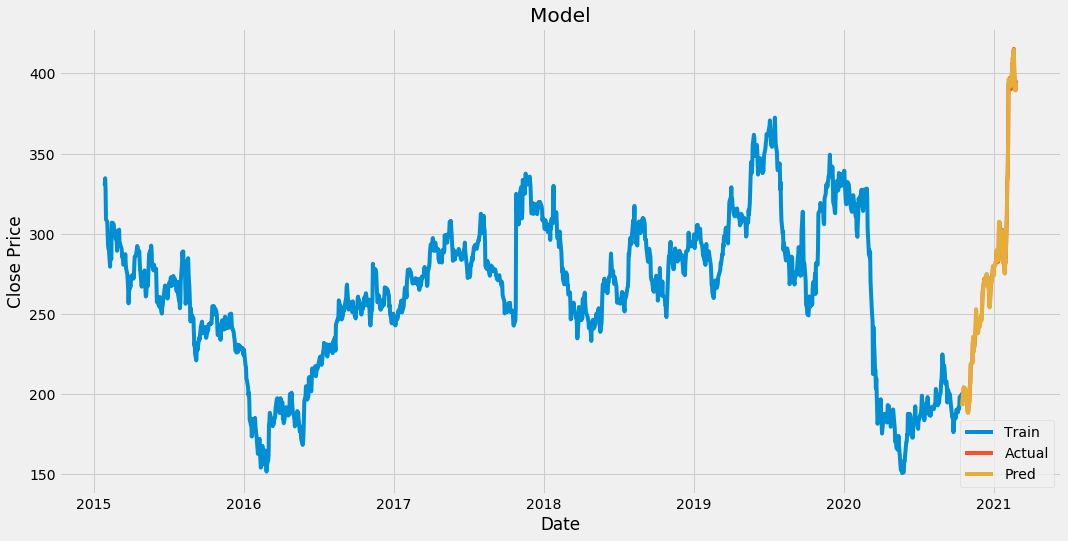

In [17]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(price[0:price.shape[0]-90])
plt.plot(tesdf[['Actual','Predicted']])
plt.legend(['Train','Actual','Pred'],loc='lower right')
plt.show()

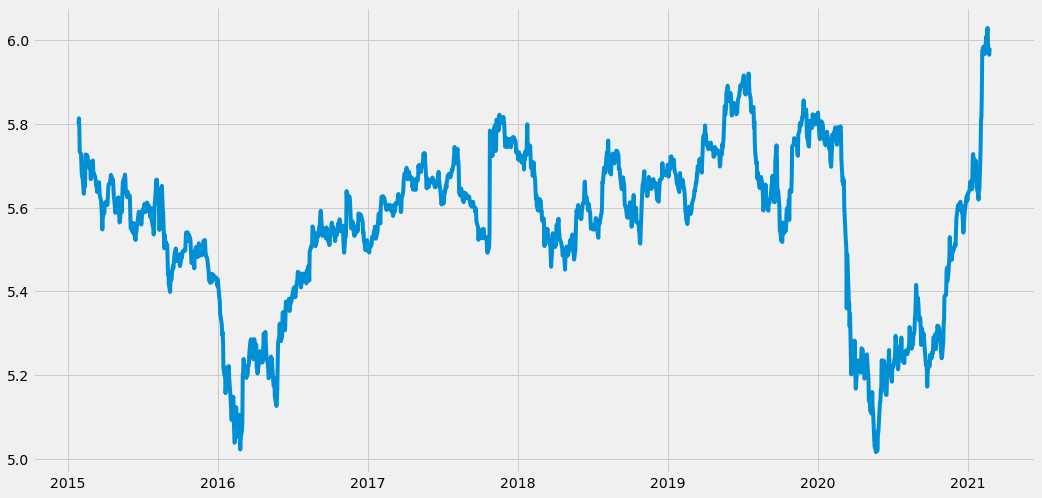

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


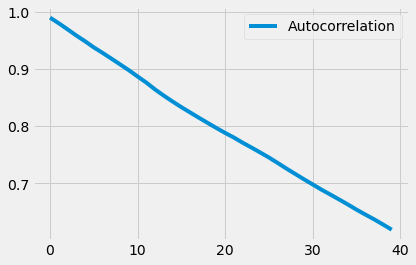

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


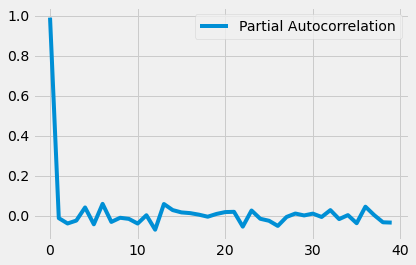

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


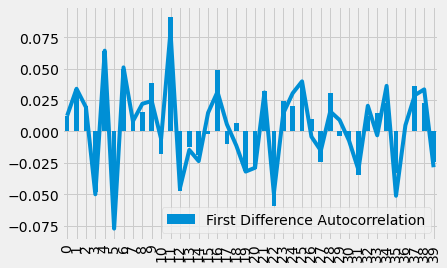

AttributeError: 'Series' object has no attribute 'as_matrix'

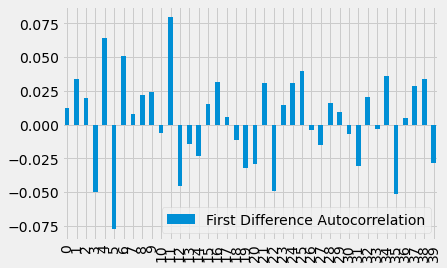

In [4]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from nsepy import get_history
from datetime import date
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight')
p="sbin"
variables= get_history(p,start=date(2015,1,27), end=date(2021,2,23))
price= variables['Close']

lnprice=np.log(price)
plt.figure(figsize=(16,8))
plt.plot(lnprice)
plt.show()

acf_1 = acf(lnprice)[1:lnprice.shape[0]-90]
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.plot(kind='line')
plt.show()

pacf_1 = pacf(lnprice)[1:lnprice.shape[0]-90]
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.plot(kind='line')
plt.show()

result= ts.adfuller(lnprice,1)
result
lnprice_diff= lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff = acf(diff)[1:diff.shape[0]-90]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.plot(kind='bar')
pacf_1_diff= pacf(diff)[1:diff.shape[0]-90]
plt.plot(pacf_1_diff)
plt.show()

test_df = pandas.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.plot(kind='bar')

price_matrix= lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,15))
model_fit=model.fit(disp=0)
predictions=model_fit.predict(lnprice.shape[0]-90,lnprice.shape[0],typ='levels')
predictionsadjusted=np.exp(predictions)
y=[round(num,2)for num in predictionsadjusted]
x=(get_history(p,start=date(2020,10,15), end=date(2021,2,23))['Close'])
tesdf= pandas.DataFrame({'Predicted':y,'Actual':x})
print("Rmse value: {}".format(np.sqrt(np.mean((y-x)**2))))
print(tesdf.tail(30))

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(price[0:price.shape[0]-90])
plt.plot(tesdf[['Actual','Predicted']])
plt.legend(['Train','Actual','Pred'],loc='lower right')
plt.show()

Rmse value: 1.1651217924357895
            Predicted  Actual
Date                         
2020-12-14     274.98  274.20
2020-12-15     270.26  270.65
2020-12-16     270.59  269.40
2020-12-17     267.36  267.70
2020-12-18     272.91  271.45
2020-12-21     254.04  254.70
2020-12-22     257.79  257.45
2020-12-23     261.91  263.00
2020-12-24     268.03  266.85
2020-12-28     273.73  275.20
2020-12-29     279.94  277.90
2020-12-30     276.34  276.90
2020-12-31     273.88  274.95
2021-01-01     279.34  279.40
2021-01-04     280.61  281.05
2021-01-05     282.79  281.75
2021-01-06     283.72  285.05
2021-01-07     289.78  287.70
2021-01-08     286.57  286.00
2021-01-11     283.33  282.50
2021-01-12     292.68  292.50
2021-01-13     307.49  306.80
2021-01-14     307.08  307.25
2021-01-15     303.75  303.85
2021-01-18     294.88  294.45
2021-01-19     298.45  298.60
2021-01-20     301.96  302.55
2021-01-21     295.61  294.85
2021-01-22     283.30  283.70
2021-01-25     280.85  280.95
2021-01-2

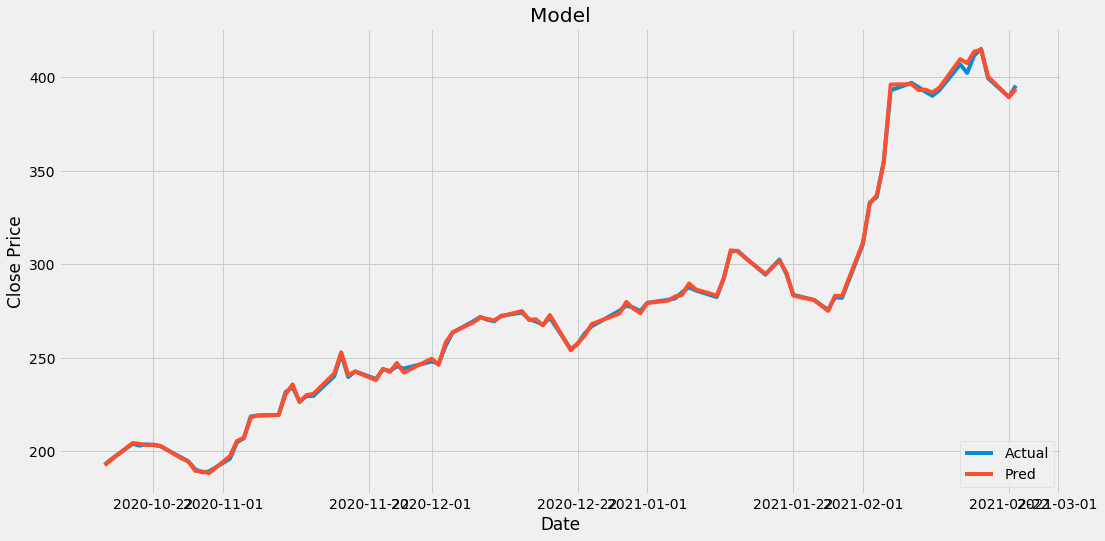

In [20]:
print("Rmse value: {}".format(np.sqrt(np.mean((y-x)**2))))
print(tesdf.tail(50))

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
#plt.plot(price[0:price.shape[0]/-90])
plt.plot(tesdf[['Actual','Predicted']])
plt.legend(['Actual','Pred'],loc='lower right')
plt.show()

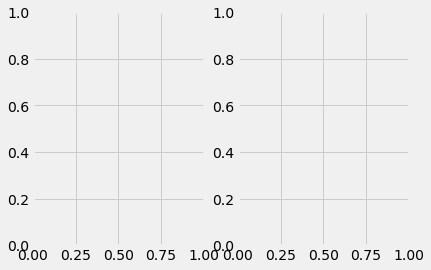

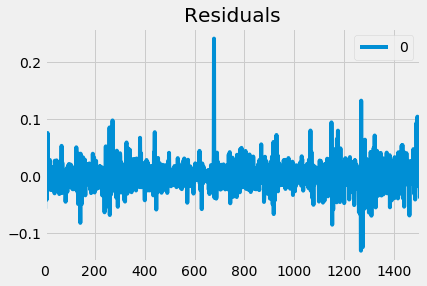

In [21]:
residuals = pandas.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals")
plt.show()

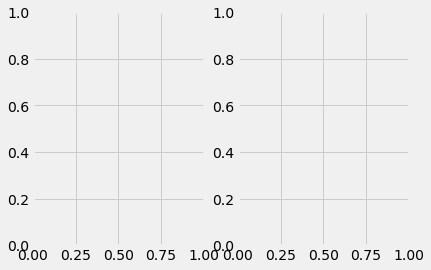

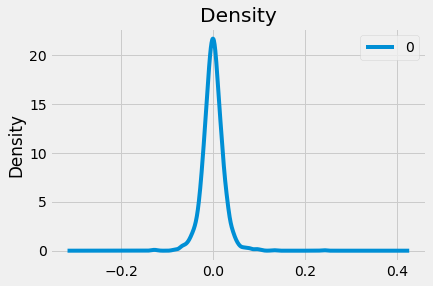

In [22]:
residuals = pandas.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(kind='kde', title='Density')
plt.show()

# Code for MLP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from nsepy import get_history
from datetime import date
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

stock = get_history('sbin',start=date(2015,1,1),end=date(2021,2,23))
stock= stock.drop(['Symbol','Series','Turnover'],1)

# Filter out required column that has to be predicted
data= stock.filter(['Close'])
dataset=data.values

#Define size of training dataset 
train_len= math.ceil(len(dataset)*.8)


# Scale the whole dataset 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


#Extract the training dataset from the original dataset
train_data=scaled_data[0:train_len,:]
x_train=[]
y_train=[]

for i in range(90,train_len):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])
    
x_train , y_train = np.array(x_train), np.array(y_train)


test_data=scaled_data[train_len-90: , :]
x_test=[]
y_test=dataset[train_len:, :]
for i in range (90, len(test_data)):
    x_test.append(test_data[i-90:i,0])

#Convert test dataset to an array
x_test=np.array(x_test)
y_test=np.array(y_test)

model=Sequential()
model.add(Dense(2200))
model.add(Dense(2570))
model.add(Dense(2800))
mlp = MLPRegressor(max_iter=300, hidden_layer_sizes=(1987,)).fit(x_train,y_train)

y_pred = mlp.predict(x_test)

y_pred= np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=scaler.inverse_transform(y_pred)

rmse = np.sqrt(np.mean((y_pred-y_test)**2))
print("Rmse value: {}".format(rmse))

ytest_pred=pd.DataFrame({'y test':np.reshape(y_test,(y_test.shape[0])),'y pred':np.reshape(y_pred,(y_pred.shape[0]))})
ytest_pred= ytest_pred.set_index((stock.tail(len(ytest_pred))).index)
print(ytest_pred.tail(50))

Rmse value: 14.923845325810841
            y test      y pred
Date                          
2020-12-14  274.20  263.012521
2020-12-15  270.65  263.088885
2020-12-16  269.40  263.621338
2020-12-17  267.70  263.311838
2020-12-18  271.45  264.015955
2020-12-21  254.70  266.172147
2020-12-22  257.45  263.658041
2020-12-23  263.00  263.157201
2020-12-24  266.85  264.199328
2020-12-28  275.20  264.769499
2020-12-29  277.90  265.557916
2020-12-30  276.90  267.914191
2020-12-31  274.95  265.239805
2021-01-01  279.40  266.092346
2021-01-04  281.05  269.110171
2021-01-05  281.75  272.313582
2021-01-06  285.05  271.437559
2021-01-07  287.70  274.394581
2021-01-08  286.00  277.853227
2021-01-11  282.50  279.222436
2021-01-12  292.50  281.409339
2021-01-13  306.80  283.669918
2021-01-14  307.25  287.723693
2021-01-15  303.85  289.308215
2021-01-18  294.45  290.532232
2021-01-19  298.60  290.257954
2021-01-20  302.55  292.009196
2021-01-21  294.85  293.838164
2021-01-22  283.70  293.871806
2021-01-